# Домашнє завдання до лекції 5: візуалізація даних.
В цьому ДЗ ми будемо багато працювати не тільки з візуалізаціями, а і з функціоналом pandas, адже візуалізація даних - це частина аналізу даних та працює спільно з агрегацією та фільтрацією наших даних. До того ж перед тим, як аналізувати дані, їх треба почистити. Чим ми і займемось.  

0.Імпортуйте matplotlib.pyplot, seaborn та pandas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
%matplotlib inline

## Набір даних Taxis

Використовуючи метод з бібліотеки `seaborn` `load_dataset` ми завантажимо перший набір даних для аналізу. Завантажимо дані так, бо це зручно + аби ви знали, що є і така можливість знайти собі набір даних для експериментів.  
Набір даних містить поїздки таксі у Нью Йорку у 2019 році. Детальний опис на [сайті](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).  

Які колонки мість набір даних:  
- `pickup` - час початку поїздки  
- `dropoff` - час закінчення поїздки  
- `passengers` - кількість пасажирів у поїздці  
- `distance` - відстань поіздки  
- `fare` - базова плата за поїздку  
- `tip` - розмір чайових  
- `tolls` - плата за платні дороги (за це також платить пасажир)  
- `total` - сумарна плата за поїздку  
- `color` - колір авто, яке здійснювало поїздку  
- `payment` - метод оплати  
- `pickup_zone` - зона, у якій почалась поїздка  
- `dropoff_zone` - зона, у якій закінчилась поїздка  
- `pickup_borough` - район, у якому почалась поїздка  
- `dropoff_borough` - район, у якому закінчилась поїздка  

Назви ознак здбільшого говорять самі за себе. Слово borough перекладається з англійської як "район".

Ми будемо працювати сами з тим шматочком даних, які наявні в seaborn.  
Переглянути всі набори даних з seaborn можна [тут](https://github.com/mwaskom/seaborn-data).

Спершу - завантажуємо дані - просто виконайте клітинку нижче.

In [3]:
df_taxi = sns.load_dataset('taxis')

1.Виведіть 
- перші 3 записи з набору даних
- типи даних в наборі даних df_taxi
- розміри набору даних

In [4]:
display(df_taxi.head(3))
display(df_taxi.dtypes)
display(df_taxi.shape)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

(6433, 14)

Очікуваний результат (можна вивести в окремих клітинках):

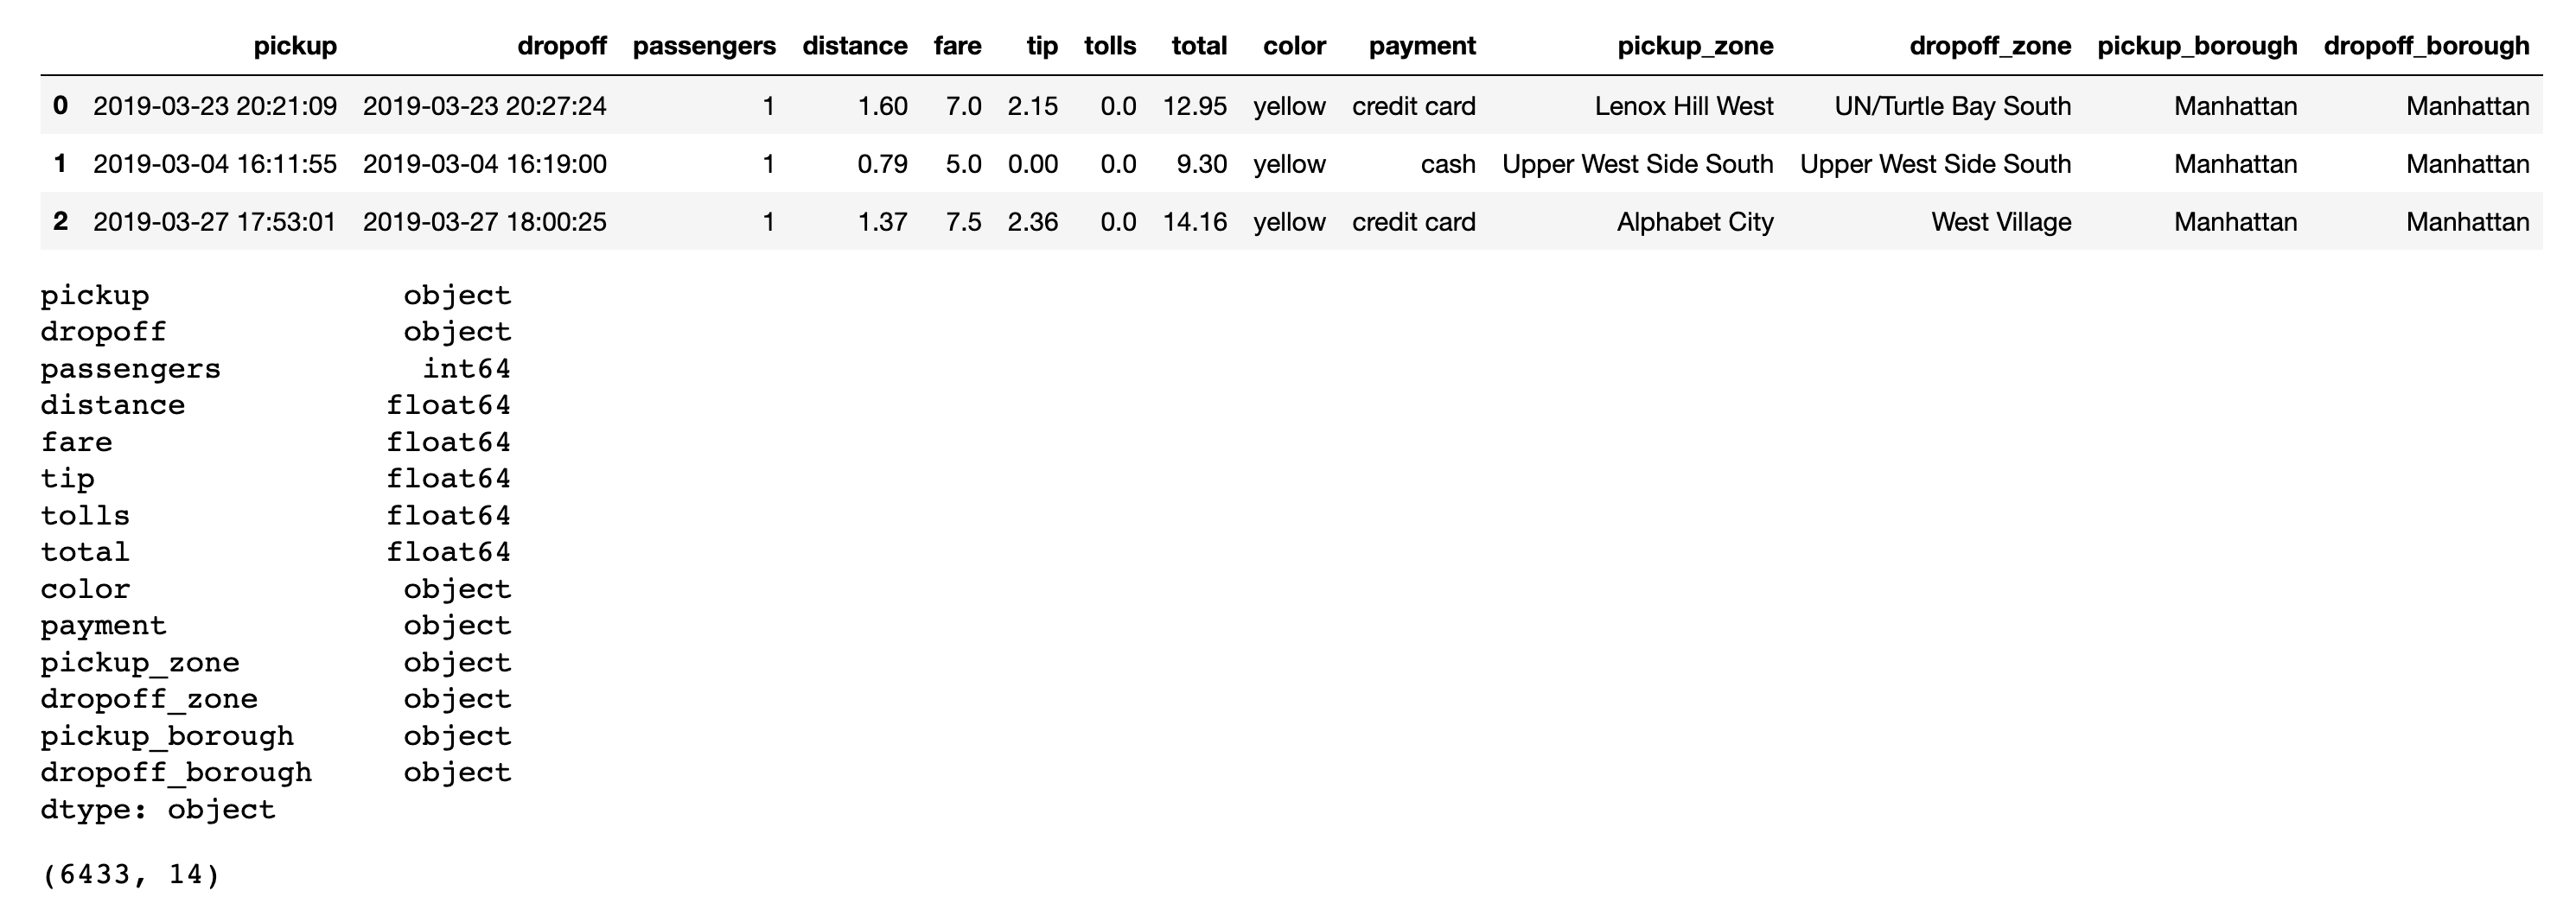

2.Перевіримо, чи є в цьому наборі даних пропущені значення. Для цього можемо вивести кількість пропущених значень в кожній колонці наступним чином (це надзвичайно корисна команда, запамʼятайте її):

In [5]:
df_taxi.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

Цікаво, чому дані відсутні? Відповідь на це питання нам дасть розуміння, чи можна такі дані видалити, чи можливо їх треба якось заповнити. Виведіть на екран ті рядки, де колонка, яка має найбільше пропущених значень (або одна з тих, що має максимальну кількість пропущених), має пропущені значення. 
Подивіться на результат і напишіть свої думки щодо питань:
- чому на ваш погляд в цих рядках є відстуні дані в кількох колонках? Чому ви так думаєте?
- чому на ваш погляд є рядки з distance==0, а total!=0? Як ви до цього прйишли?
Відповідь просто текстом. Можна використовувати будь-які допоміжні операції над датасетом чи джерела, які допоможуть вам відповісти на ці питання. Якщо щось використовуєте, то це треба зазначити у відповіді.  

Ваша відповідь тут - це 70% виконання цього завдання.

In [6]:
# Спочатку створимо стовпець з тривалістю поїздки в хвилинах:
df_taxi['trevel_time'] = ((df_taxi.dropoff - df_taxi.pickup).dt.total_seconds()/60)
#df_taxi['fact_distance'] = np.where(df_taxi['distance'] == 0, 'distance is 0 km', 'distance is over 0 km')

In [7]:
# Виводимо дані таблиці, де одна з тих колонок, яка має найбільше пропущених значень, має пропущені значення:
df_taxi[df_taxi[df_taxi
                .isna()
                .sum()
                .idxmax()]
        .isnull()]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,trevel_time
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN,0.050000
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.00,120.0,33.20,12.50,166.00,yellow,credit card,NaN,NaN,NaN,NaN,0.316667
711,2019-03-21 17:39:50,2019-03-21 18:12:54,2,1.74,17.0,4.26,0.00,25.56,yellow,credit card,Midtown East,NaN,Manhattan,NaN,33.066667
739,2019-03-14 00:09:17,2019-03-14 00:09:21,1,0.03,2.5,0.00,0.00,3.80,yellow,cash,Upper East Side South,NaN,Manhattan,NaN,0.066667
970,2019-03-29 00:02:00,2019-03-29 00:02:05,2,0.00,45.0,5.00,0.00,50.30,yellow,credit card,NaN,NaN,NaN,NaN,0.083333
1108,2019-03-10 09:33:13,2019-03-10 09:52:04,1,13.40,52.0,11.70,5.76,70.26,yellow,credit card,NaN,NaN,NaN,NaN,18.850000
1112,2019-03-12 19:09:23,2019-03-12 19:20:46,1,0.90,8.5,1.92,0.00,14.72,yellow,credit card,Times Sq/Theatre District,NaN,Manhattan,NaN,11.383333
1230,2019-03-29 07:52:46,2019-03-29 08:02:40,1,0.90,5.5,1.76,0.00,10.56,yellow,credit card,Yorkville East,NaN,Manhattan,NaN,9.900000
1690,2019-03-22 06:24:14,2019-03-22 06:24:14,1,0.00,72.0,0.00,0.00,72.00,yellow,NaN,East New York,NaN,Brooklyn,NaN,0.000000
1787,2019-03-28 06:58:57,2019-03-28 07:18:10,1,6.32,20.5,4.26,0.00,25.56,yellow,credit card,Manhattan Valley,NaN,Manhattan,NaN,19.216667


In [8]:
# Виводимо дані таблиці, де одна з тих колонок, яка має найбільше пропущених значень, має пропущені значення
#  та де distance > 0:
df_taxi[(df_taxi[df_taxi
                .isna()
                .sum()
                .idxmax()]
        .isnull()) & (df_taxi.distance > 0)]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,trevel_time
711,2019-03-21 17:39:50,2019-03-21 18:12:54,2,1.74,17.0,4.26,0.00,25.56,yellow,credit card,Midtown East,NaN,Manhattan,NaN,33.066667
739,2019-03-14 00:09:17,2019-03-14 00:09:21,1,0.03,2.5,0.00,0.00,3.80,yellow,cash,Upper East Side South,NaN,Manhattan,NaN,0.066667
1108,2019-03-10 09:33:13,2019-03-10 09:52:04,1,13.40,52.0,11.70,5.76,70.26,yellow,credit card,NaN,NaN,NaN,NaN,18.850000
1112,2019-03-12 19:09:23,2019-03-12 19:20:46,1,0.90,8.5,1.92,0.00,14.72,yellow,credit card,Times Sq/Theatre District,NaN,Manhattan,NaN,11.383333
1230,2019-03-29 07:52:46,2019-03-29 08:02:40,1,0.90,5.5,1.76,0.00,10.56,yellow,credit card,Yorkville East,NaN,Manhattan,NaN,9.900000
1787,2019-03-28 06:58:57,2019-03-28 07:18:10,1,6.32,20.5,4.26,0.00,25.56,yellow,credit card,Manhattan Valley,NaN,Manhattan,NaN,19.216667
2089,2019-03-12 16:21:28,2019-03-12 16:43:40,1,5.69,21.0,0.00,0.00,22.80,yellow,cash,JFK Airport,NaN,Queens,NaN,22.200000
2137,2019-03-08 13:27:32,2019-03-08 13:46:23,1,1.40,12.0,3.05,0.00,18.35,yellow,credit card,NaN,NaN,NaN,NaN,18.850000
2180,2019-03-09 15:00:06,2019-03-09 15:50:29,2,14.82,50.5,0.00,2.64,53.94,yellow,credit card,Flatiron,NaN,Manhattan,NaN,50.383333
2231,2019-03-11 10:17:31,2019-03-11 11:03:55,1,26.35,130.0,0.00,5.76,136.56,yellow,cash,East Harlem North,NaN,Manhattan,NaN,46.400000


In [9]:
df_taxi[df_taxi.distance == 0]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,trevel_time
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.0,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN,0.050000
120,2019-03-21 17:21:44,2019-03-21 17:21:49,1,0.0,2.5,0.00,0.00,4.30,yellow,cash,JFK Airport,JFK Airport,Queens,Queens,0.083333
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.0,120.0,33.20,12.50,166.00,yellow,credit card,NaN,NaN,NaN,NaN,0.316667
670,2019-03-08 04:50:48,2019-03-08 04:51:07,1,0.0,2.5,0.00,0.00,6.30,yellow,cash,Lenox Hill East,Lenox Hill East,Manhattan,Manhattan,0.316667
970,2019-03-29 00:02:00,2019-03-29 00:02:05,2,0.0,45.0,5.00,0.00,50.30,yellow,credit card,NaN,NaN,NaN,NaN,0.083333
1080,2019-03-04 14:17:05,2019-03-04 14:17:13,1,0.0,2.5,0.00,0.00,3.30,yellow,cash,JFK Airport,JFK Airport,Queens,Queens,0.133333
1207,2019-03-08 15:41:20,2019-03-08 15:41:23,1,0.0,2.5,0.00,0.00,5.80,yellow,NaN,Hudson Sq,Hudson Sq,Manhattan,Manhattan,0.050000
1482,2019-03-10 20:27:25,2019-03-10 20:28:33,1,0.0,52.0,16.59,0.00,71.89,yellow,credit card,Lincoln Square East,Lincoln Square East,Manhattan,Manhattan,1.133333
1690,2019-03-22 06:24:14,2019-03-22 06:24:14,1,0.0,72.0,0.00,0.00,72.00,yellow,NaN,East New York,NaN,Brooklyn,NaN,0.000000
1910,2019-03-25 14:37:56,2019-03-25 14:38:22,1,0.0,2.5,0.01,0.00,3.31,yellow,credit card,Queensbridge/Ravenswood,Queensbridge/Ravenswood,Queens,Queens,0.433333


In [10]:
df_taxi[(df_taxi['pickup_zone']
        .isnull()) & (df_taxi.distance > 0)]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,trevel_time
606,2019-03-19 15:04:40,2019-03-19 15:06:15,1,0.40,3.5,1.35,0.00,8.15,yellow,credit card,NaN,Upper East Side South,NaN,Manhattan,1.583333
671,2019-03-09 22:45:46,2019-03-09 22:46:50,1,0.40,3.5,0.00,0.00,7.30,yellow,cash,NaN,Lincoln Square East,NaN,Manhattan,1.066667
712,2019-03-03 01:24:45,2019-03-03 01:29:32,1,0.80,5.0,1.75,0.00,10.55,yellow,credit card,NaN,West Chelsea/Hudson Yards,NaN,Manhattan,4.783333
1108,2019-03-10 09:33:13,2019-03-10 09:52:04,1,13.40,52.0,11.70,5.76,70.26,yellow,credit card,NaN,NaN,NaN,NaN,18.850000
1961,2019-03-19 16:43:59,2019-03-19 17:37:22,1,17.82,52.0,13.11,5.76,78.67,yellow,credit card,NaN,Garment District,NaN,Manhattan,53.383333
2137,2019-03-08 13:27:32,2019-03-08 13:46:23,1,1.40,12.0,3.05,0.00,18.35,yellow,credit card,NaN,NaN,NaN,NaN,18.850000
3085,2019-03-24 15:43:02,2019-03-24 16:02:57,1,3.20,14.5,0.00,0.00,15.30,yellow,cash,NaN,NaN,NaN,NaN,19.916667
3259,2019-03-30 00:39:09,2019-03-30 00:43:34,1,0.84,5.0,1.70,0.00,10.50,yellow,credit card,NaN,NaN,NaN,NaN,4.416667
3793,2019-03-24 06:07:30,2019-03-24 06:12:22,1,1.50,6.5,0.00,0.00,9.80,yellow,NaN,NaN,Midtown East,NaN,Manhattan,4.866667
4127,2019-03-01 05:18:21,2019-03-01 05:18:30,2,0.04,2.5,0.00,0.00,3.80,yellow,cash,NaN,NaN,NaN,NaN,0.150000


In [11]:
# Подивимось скільки відсотків незаповнених даних ми маємо:
round(df_taxi.isna().sum()/(df_taxi.shape[0])*100, 2)

pickup             0.00
dropoff            0.00
passengers         0.00
distance           0.00
fare               0.00
tip                0.00
tolls              0.00
total              0.00
color              0.00
payment            0.68
pickup_zone        0.40
dropoff_zone       0.70
pickup_borough     0.40
dropoff_borough    0.70
trevel_time        0.00
dtype: float64

Відповіді.
Розгляд цих питань хочу роздивлятись відносно стовпця distance, а саме коли distance==0 та distance>0.
1) У рядках, де distance>0 і є видсутні дані в деяких стовпцях, можна зробити здогадку, що дані не заповнені через слабкий сигнал інтернету чи його відсутність. Т.я. можна побачити, що частіше всього трапляються такі незаповнені стовпці:
    * Всі чотири незаповнені: pickup_zone, dropoff_zone, pickup_borough, dropoff_borough;
    * Два стовпця початка поїздки: pickup_zone, pickup_borough;
    * Два стовпця кінця поїздки: dropoff_zone, dropoff_borough;
    
2) У рядках, де distance==0 та total!=0, знаходяться скоріш за все відмінені замовлення на це вказує 
  * distance==0, 
  * маленька різниця між початком поїздки та кінцем поїздки
 Можливо у випадках, де distance==0 і всі поля заповнені - це поїдки, які були замовлені заздалегіть( можливо на якусь конкретну годину в конкретний день, але потім відмінені), а поїздки в яких distance==0 і є незаповнені дані про зону та район кінця поїздки(чи зовсім не заповнені поля зони та району початку поїздки та кінця), то це поїздки які або майже відразу відмінили, або водій вже приїхав, чекав і поїздку відмінили.
 
 В будь-якому з цих випадків з кліента буде стягуватись плата за відміну поїздки та витрачений час водія на дорогу до кліента, бензин, час очікування, можливо за платні дороги, які водій перетнув, коли їхав до кліента(це ж дані по Нью-Йорку).
 
 Тому видаляти такі дані не слід, т.я. вони важливі.

3.Заповнимо пусті значення. Оскільки всі колонки набору даних мають пропущені значення в рядках з типом даних рядок, заповнимо пропущені значення рядком `NA`.
Створіть набір даних `df_taxi_clean`, який містить дані `df_taxi` із заповненими пропущеними значеннями у всіх колонках (де ті значення відсутні) значенням `NA`.

**УВАГА!** Надалі в роботі треба використовувати `df_taxi_clean`, ми ж його і створили для того, аби далі ним користуватись :)

In [12]:
df_taxi_clean = df_taxi.copy()
df_taxi_clean.fillna('NA', inplace=True)

In [13]:
df_taxi.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
trevel_time         0
dtype: int64

Після виконання завдання запустіть наступну клітинку:

In [14]:
df_taxi_clean.isna().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
trevel_time        0
dtype: int64

Очікуваний результат виконання коду в попердній клітинці:

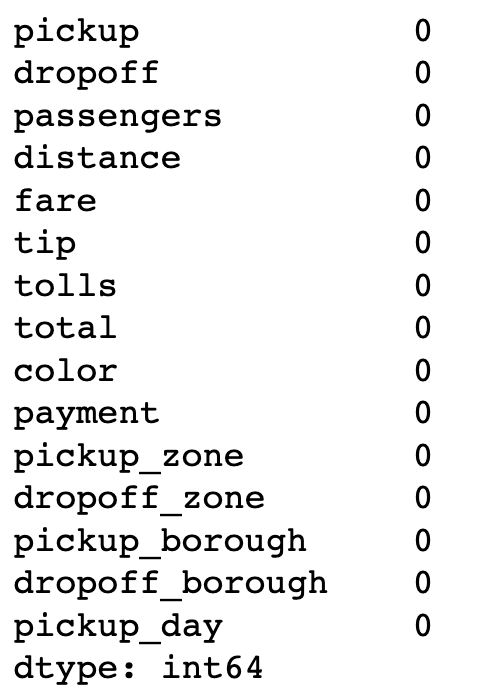

4.Хочеться подивитись на дані у динаміці. Перетворіть колонку `pickup` набору даних `df_taxi_clean` (нам нема чого працювати з "брудними" даними, якщо ми їх вже почистили, але хай будуть в окремій змінній про всяк випадок) у формат `datetime64[ns]`. Результат перетворення збережіть в тій самій колонці `pickup`.

In [15]:
pd.to_datetime(df_taxi_clean['pickup'])

0      2019-03-23 20:21:09
1      2019-03-04 16:11:55
2      2019-03-27 17:53:01
3      2019-03-10 01:23:59
4      2019-03-30 13:27:42
               ...        
6428   2019-03-31 09:51:53
6429   2019-03-31 17:38:00
6430   2019-03-23 22:55:18
6431   2019-03-04 10:09:25
6432   2019-03-13 19:31:22
Name: pickup, Length: 6433, dtype: datetime64[ns]

Після виконання завдання запустіть наступну клітинку:

In [16]:
df_taxi_clean.dtypes

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
trevel_time               float64
dtype: object

In [17]:
df_taxi[df_taxi['pickup'].dt.strftime('%Y-%m-%d') =='2019-03-02'].count()

pickup             198
dropoff            198
passengers         198
distance           198
fare               198
tip                198
tolls              198
total              198
color              198
payment            194
pickup_zone        198
dropoff_zone       198
pickup_borough     198
dropoff_borough    198
trevel_time        198
dtype: int64

In [18]:
df_taxi_clean.pickup.head(3)

0   2019-03-23 20:21:09
1   2019-03-04 16:11:55
2   2019-03-27 17:53:01
Name: pickup, dtype: datetime64[ns]

Очікуваний результат виконання коду в попердній клітинці:

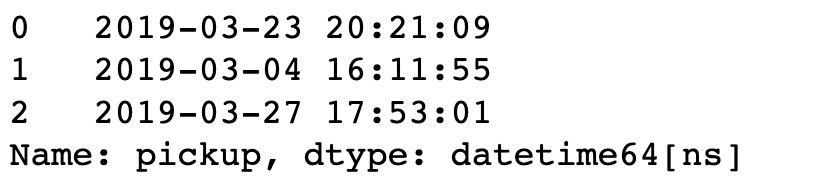

5.У нас колонка pickup зараз містить дані у форматі дата-час. Пропоную прибрати час і зробити аналітику по дням. Для цього виконайте клітинку нижче:

In [19]:
df_taxi_clean['pickup_day'] = df_taxi_clean.pickup.dt.floor('d')

А тепер згрупуйте дані по pickup_day та виведіть графік сумарних платежів по дням. Після виведення графіку скажіть, чи бачите щось дивне на ньому?

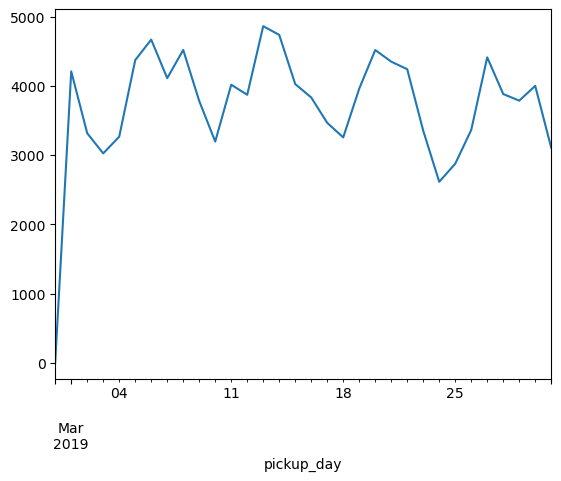

In [20]:
df_taxi_clean.groupby('pickup_day').total.sum().plot();

### В ці дані попала дата за лютий місяць і схоже, що в цю дату попали не всі поїздки, т.я. даних дуже мало порівняно з іншими днями березня. Тому графік дуже піднявся вгору.

Очікується графік:

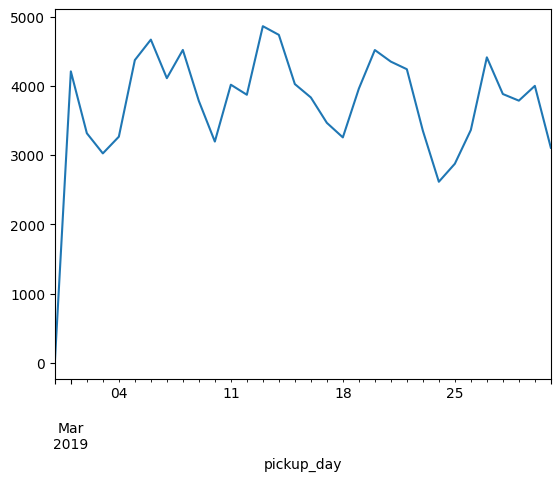

6.Виведіть кількість рядків для кожного pickup_day.

In [21]:
df_taxi_clean.groupby('pickup_day').total.count()

pickup_day
2019-02-28      1
2019-03-01    241
2019-03-02    198
2019-03-03    169
2019-03-04    171
2019-03-05    228
2019-03-06    257
2019-03-07    218
2019-03-08    235
2019-03-09    204
2019-03-10    185
2019-03-11    209
2019-03-12    218
2019-03-13    244
2019-03-14    260
2019-03-15    201
2019-03-16    220
2019-03-17    178
2019-03-18    173
2019-03-19    201
2019-03-20    233
2019-03-21    221
2019-03-22    229
2019-03-23    209
2019-03-24    149
2019-03-25    155
2019-03-26    178
2019-03-27    232
2019-03-28    205
2019-03-29    209
2019-03-30    215
2019-03-31    187
Name: total, dtype: int64

Маєте побачити, що для дати 2019-02-28 є тільки один рядок. Це запис, який, схоже, потрапив сюди випадково, видаліть з набору даних df_taxi_clean рядок, що містить pickup_day рівний 2019-02-28. Та знову виведіть графік сумарних платежів по pickup_day.

In [22]:
# Видаляемо запис з датою 2019-02-28:
df_taxi_clean = df_taxi_clean.drop((df_taxi_clean[df_taxi_clean.pickup_day == '2019-02-28']).index)

<Axes: xlabel='pickup_day'>

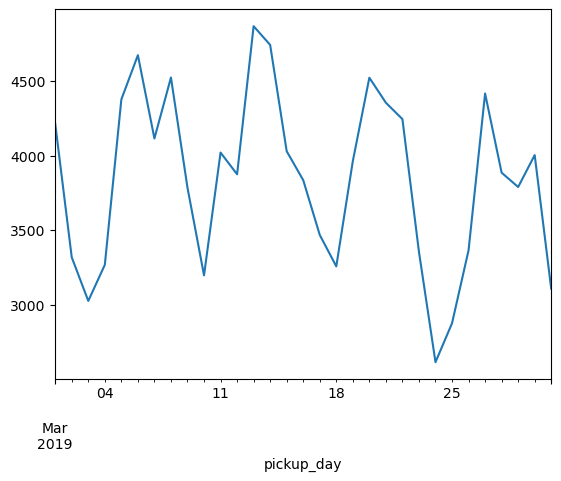

In [23]:
df_taxi_clean.groupby('pickup_day').total.sum().plot()

Очікуваний графік:

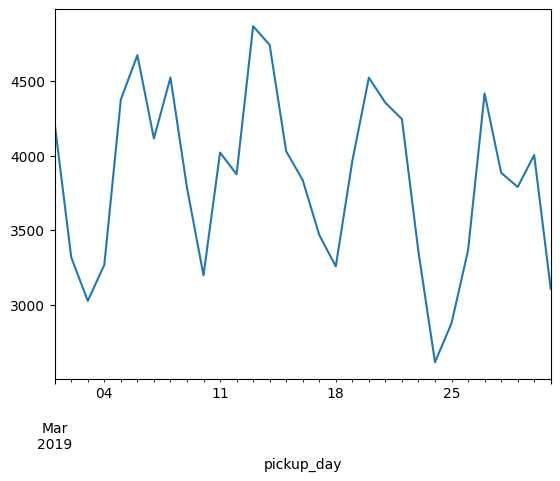

7.Давайте подивимось на динаміку сумарних платежів по районам. Для цього сформуйте на основі `df_taxi_clean` зводну таблицю, де рядками є `pickup_day`, колонками `pickup_borough`, а значенням - сума платежів. Запишіть зводну таблицю в змінну `borough_pivot`. Наостанок, вилучіть колонку зі значенням `pickup_borough` рівним `NA` - уявімо, що ці дані нас не цікавлять.

In [24]:
borough_pivot = df_taxi_clean.pivot_table(index=['pickup_day']
                                   , columns=['pickup_borough']
                                   , values=['total']
                                   , fill_value = 0
                                   , aggfunc= 'sum')
borough_pivot.columns = borough_pivot.columns.droplevel(level = [0])
borough_pivot.drop(columns='NA', inplace=True)
borough_pivot

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
pickup_day,,,,
2019-03-01,123.42,353.05,3169.47,553.29
2019-03-02,0.00,146.56,2716.33,456.13
2019-03-03,80.75,407.06,2100.23,428.73
2019-03-04,92.00,188.73,2026.17,962.18
2019-03-05,98.16,558.40,2981.26,739.56
2019-03-06,130.65,198.53,3501.07,833.36
2019-03-07,0.00,440.75,3087.82,587.13
2019-03-08,79.20,237.47,3408.85,780.34
2019-03-09,80.22,187.88,2967.71,511.73


Далі запустіть наступну клітинку та дайте відповідь на питання, в якому районі найчастіше найбільша сума денних платежів за поїздки на таксі?   
До речі, також рекомендую спробувати запустити команду `borough_pivot.plot()` та зрозуміти, навіщо нам тут частина `fillna(0)`.

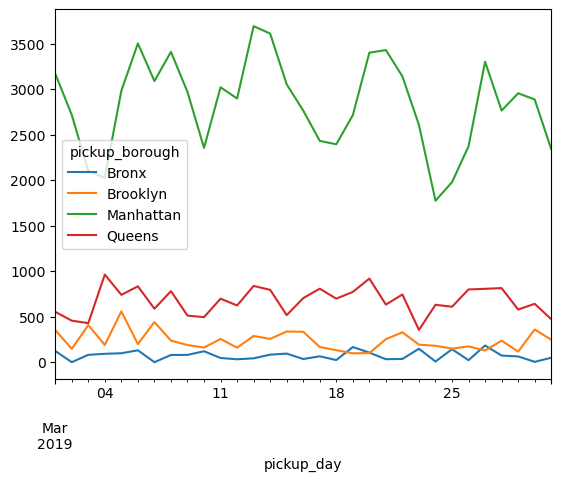

In [25]:
borough_pivot.fillna(0).plot();

Очікуваний графік :

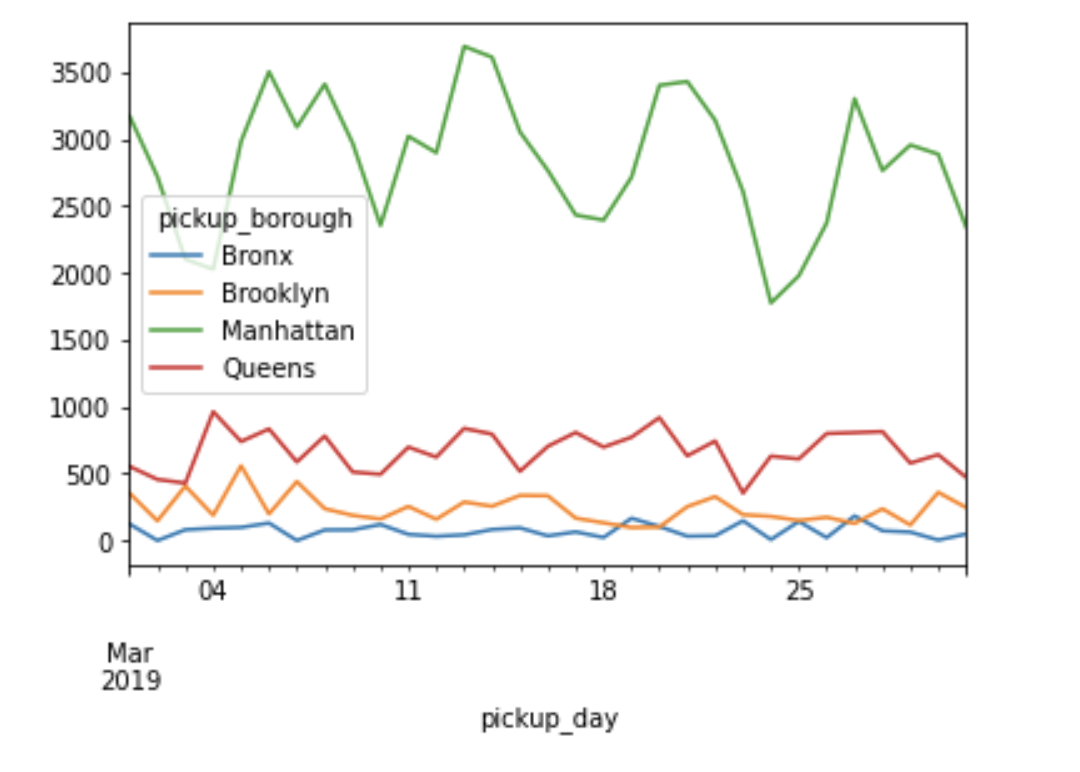

8.Виведіть будь-яким способом гістограми суми денних платежів за поїздки по кожному з районів. Має бути 4 гістограми, на 4ох різних фігурах, або на одній.   
`Підказка:` Найпростіше це буде зробити, використавши `borough_pivot`.  
Пограйтесь з кількістю бінів. Яка кількість бінів на ваш погляд тут є вдалою? Чому?

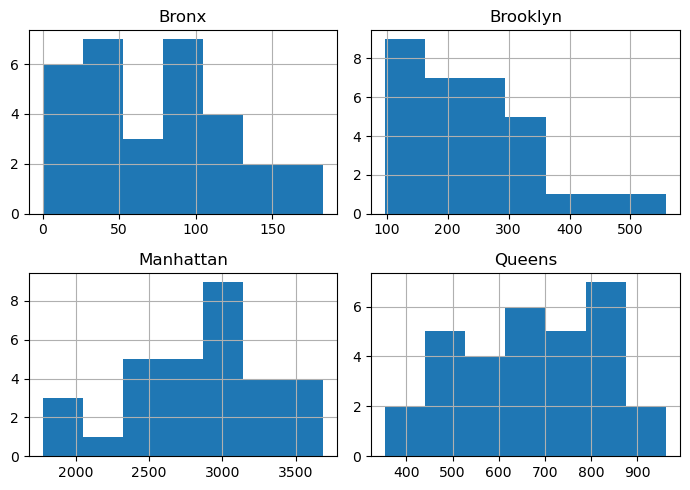

In [26]:
borough_pivot.hist(figsize=(7,5), bins = 7)
plt.tight_layout();

### Думаю, що  bins можна поставити 7 чи 8. Мабуть деталізувати більше нема сенсу, а зробивши деталізацію менше можна загубити "викиди"...

In [27]:
#np.histogram(borough_pivot.Bronx, bins=8)

Приклад одного з правильних виконань завдання:

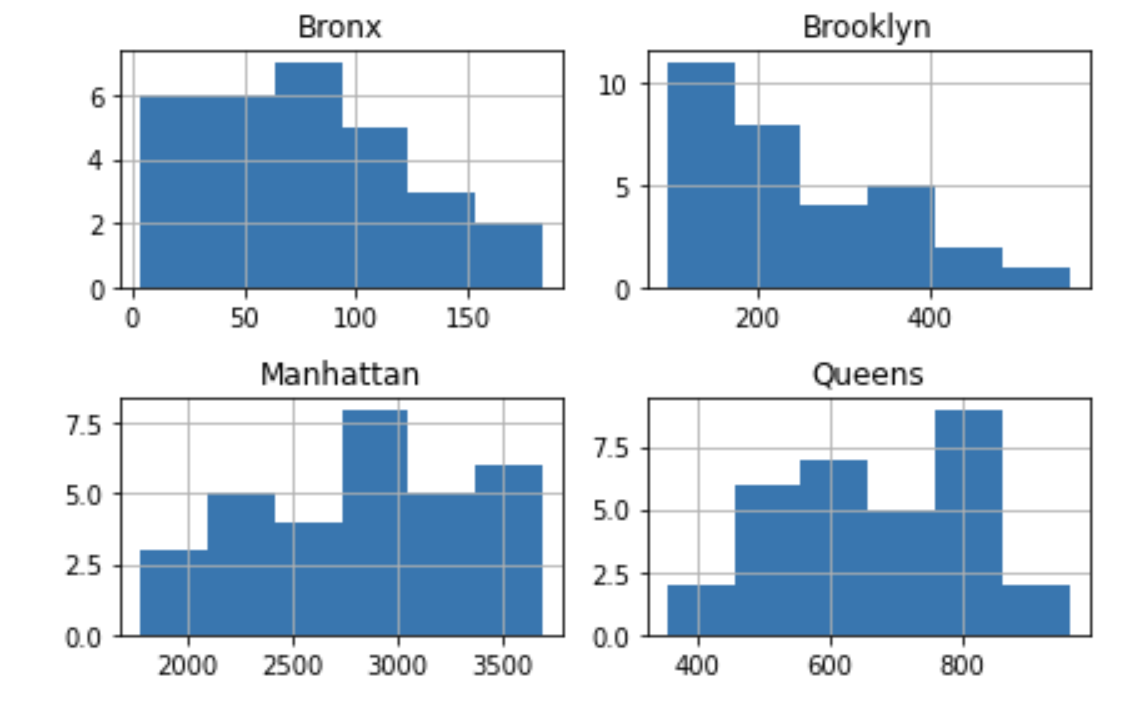

9.Бачимо, що на окремих гістограмах у нас різні діапазони чеків. Припустимо, нам хочеться порівняти розподіли денних сум платежів по райнам. Давайте для цього виведемо 4 гістограми на одній фігурі. Вони звісно ж мають бути різного кольору і напівпрозорими для комфортного перегляду. Створіть гістограму максимально близьку до тої, що надана в очікуваному результаті.
`Підказка:` ця візуалізація створена з допомогою pandas plotting.

''

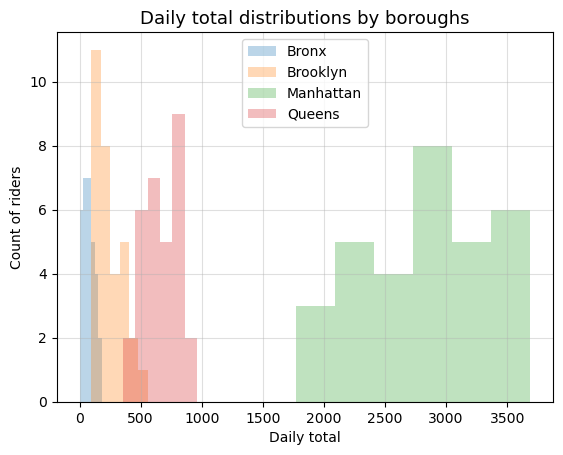

In [28]:
kwargs = dict(histtype='barstacked', alpha=0.3, bins=6)

plt.hist(borough_pivot['Bronx'], **kwargs)
plt.hist(borough_pivot['Brooklyn'], **kwargs)
plt.hist(borough_pivot['Manhattan'], **kwargs)
plt.hist(borough_pivot['Queens'], **kwargs)

plt.xlabel('Daily total') 
plt.ylabel('Count of riders') 
plt.legend(borough_pivot.columns, loc='upper center')
plt.title("Daily total distributions by boroughs", fontsize=13)
plt.grid(axis='both', alpha=.4)
;

Очікуваний результат:

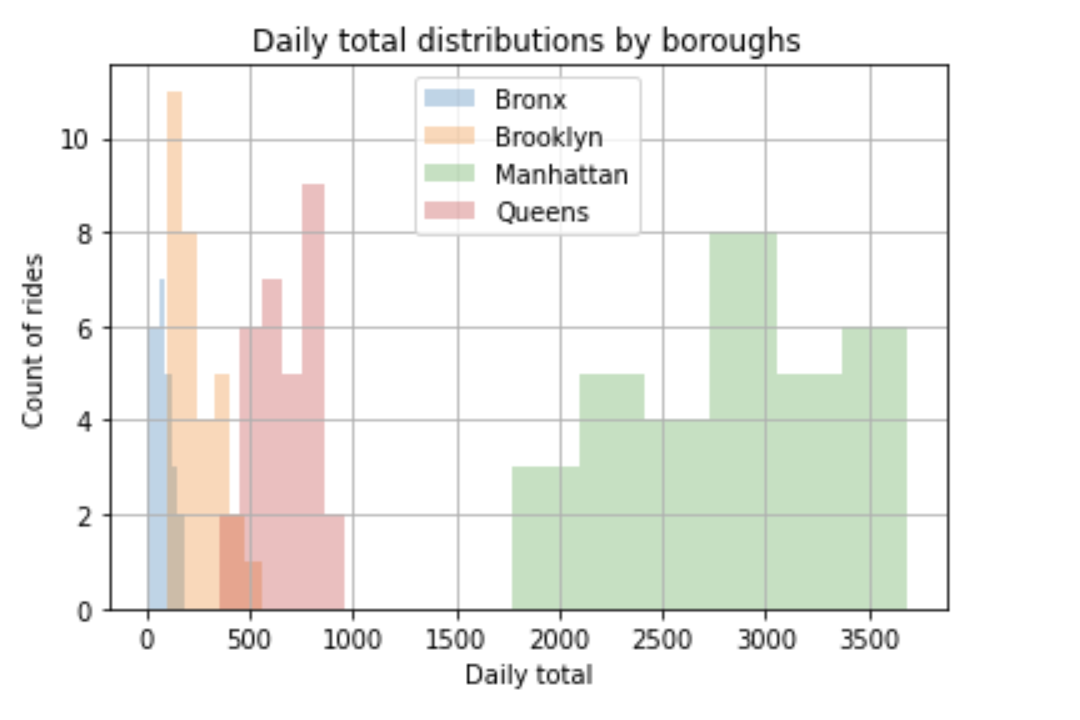

А ось приклад, як можна було сформувати щось подібне з допомогою функціоналу seaborn. Як на мене візуалізація за замовчанням не є зручною для розуміння.  

`Опціональне завдання`: Пограйтесь з налаштуваннями і пошукайте варіант, за якого візуалізація розподілу суми денних платежів через seaborn є на ваш погляд зручною для аналізу.

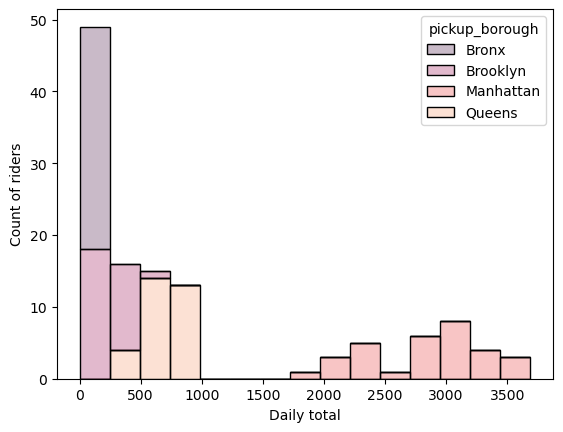

In [29]:
new_hist = sns.histplot(data=borough_pivot
                        ,palette="rocket"
                        ,label="Daily total distributions by boroughs"
                        , bins=15
                        , alpha = .3
                        , multiple="stack")
new_hist.set(xlabel='Daily total', ylabel = 'Count of riders');

10.З допомогою seaborn виведіть гістограми суми щомісячних платежів по кольорам автомобілів (колонка `color`). На одній фігурі має бути кількість гістограм рівна кількості різних кольорів автомобілів в наборі даних. Встановіть розмір фігури (10,5) та знайдіть значення dots-per-inch для фігури за якого якість зображення буде хорошою (зображення не буде розмитим).
`Підказки:` 
1. побудувати візуалізацію можна в один рядок коду, і ще один рядок - для встановлення розмірів і роздільної здатності фігури. 
2. для зміни порядку відображення гістограм кольорів автомобілів (аби менша гістограма була перед, а не за більшою) можна посортувати датафрейм за полем кольору так, аби отримати той порядок, який вам потрібен. 

''

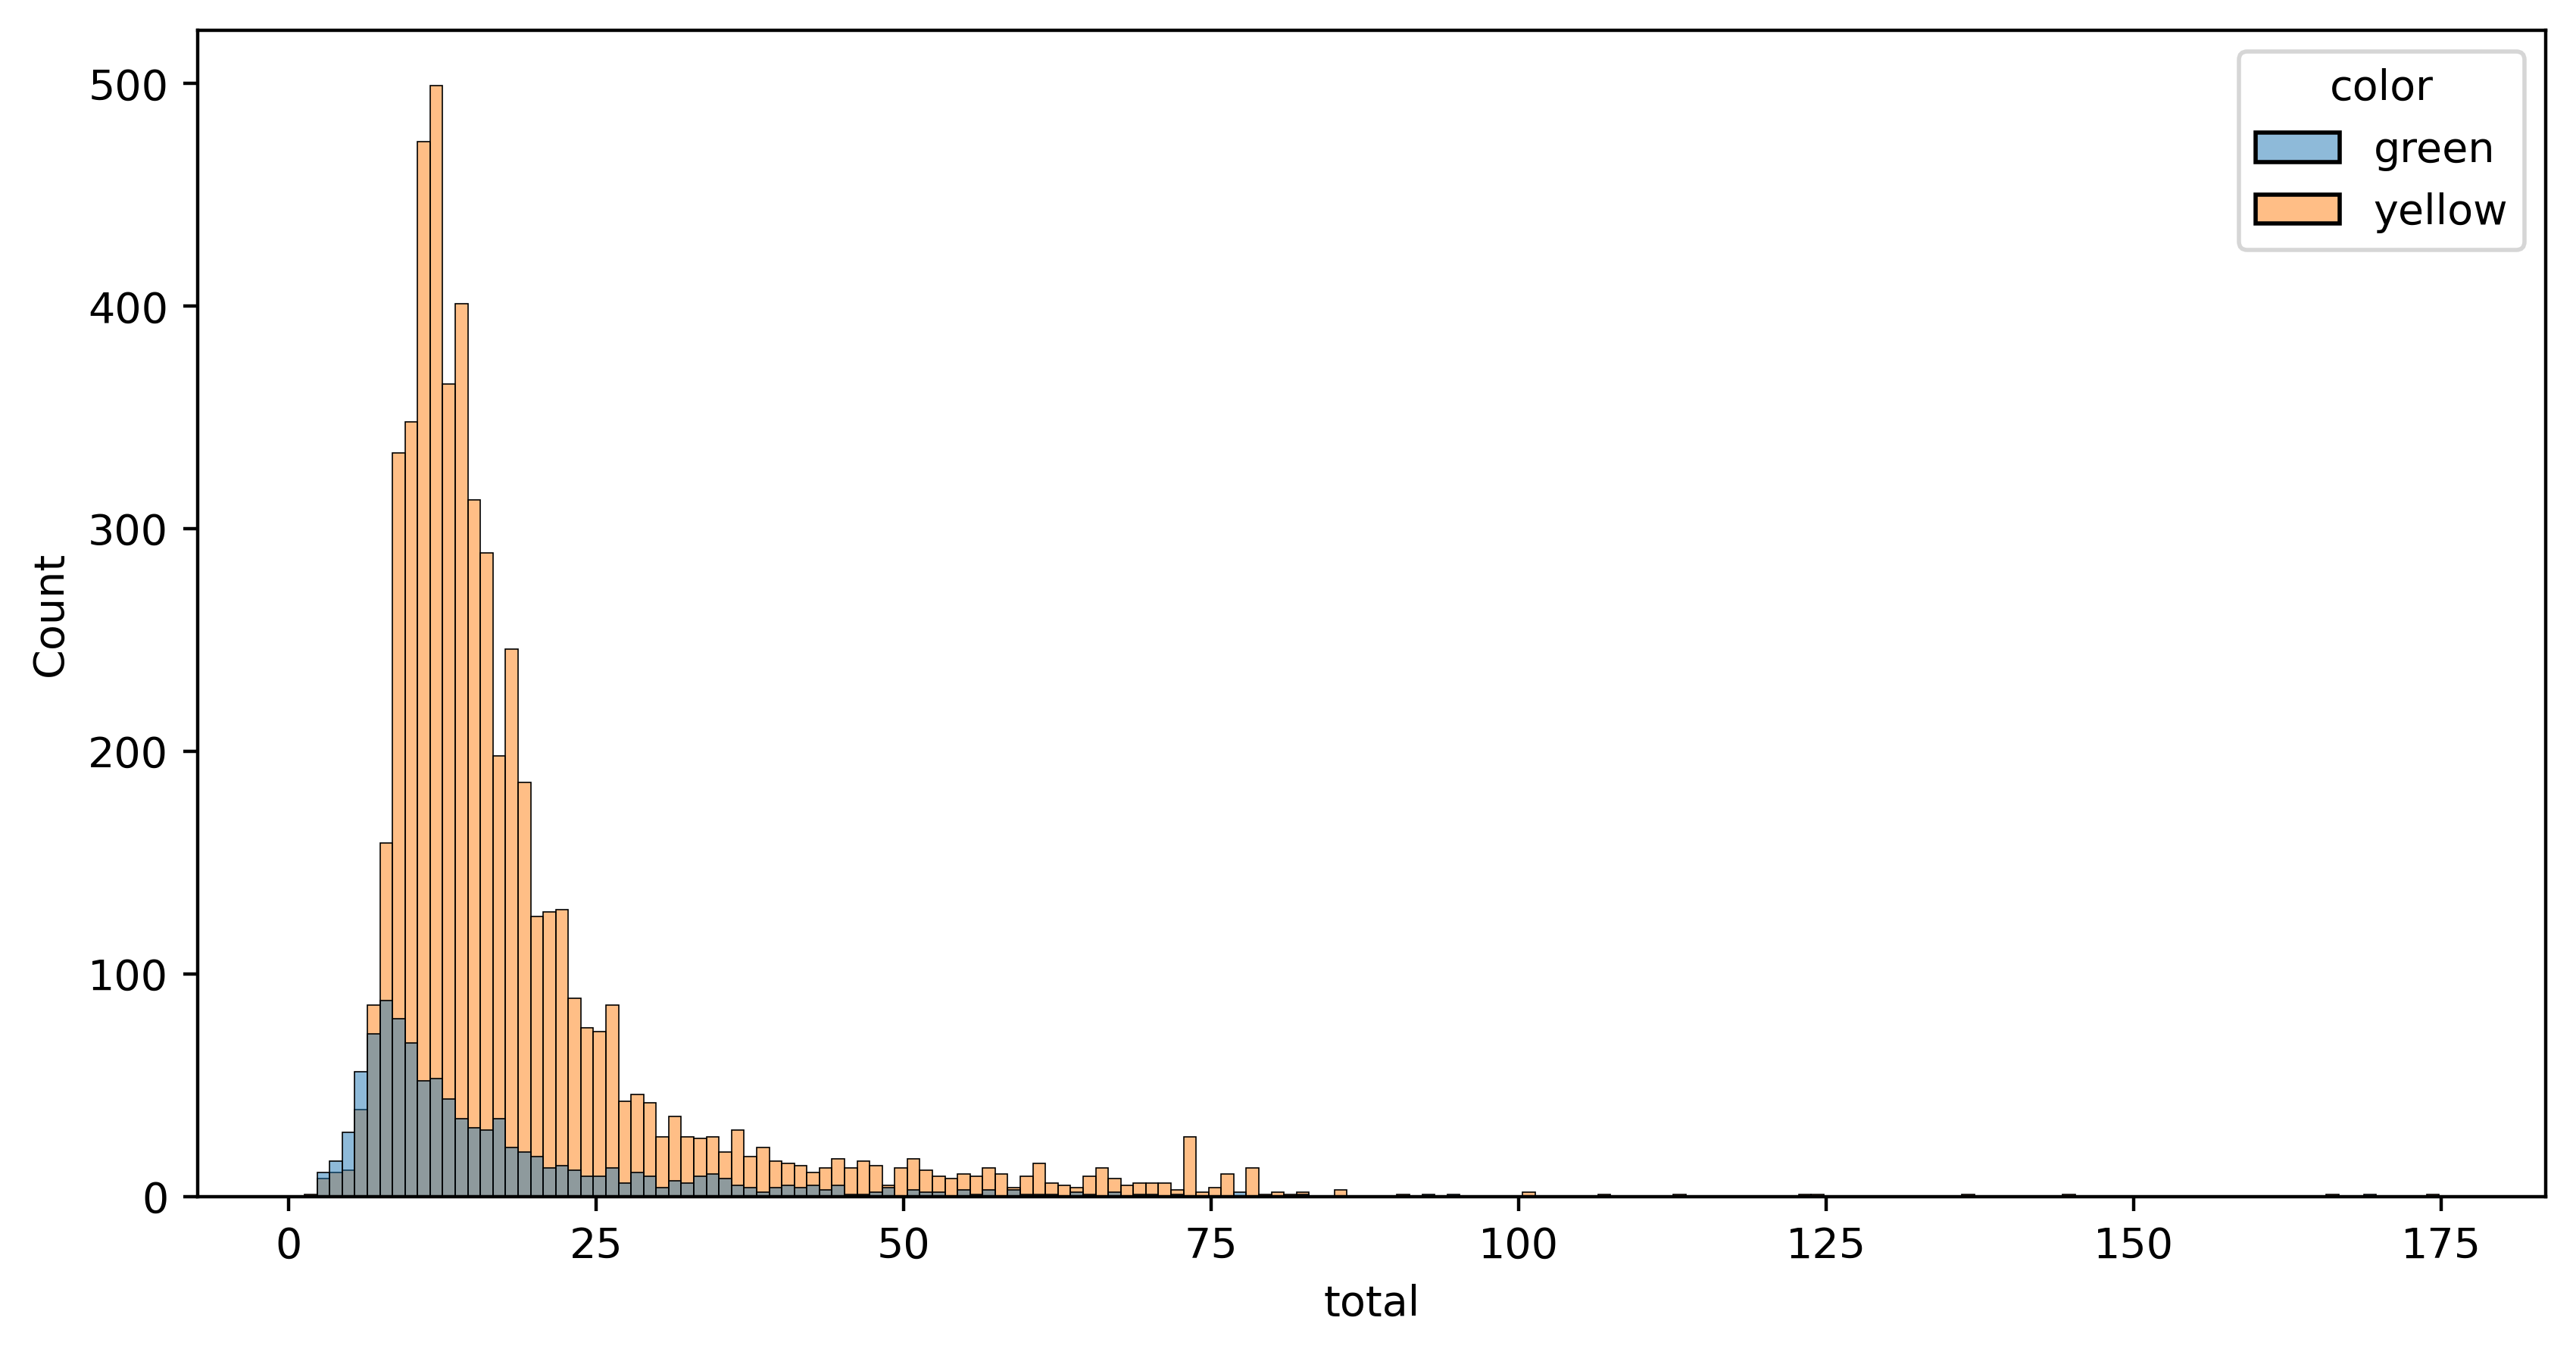

In [30]:
plt.figure(figsize=(10,5), dpi= 400)
sns.histplot(x = df_taxi_clean.total, hue = df_taxi_clean.color, hue_order=['green', 'yellow'])
;
# Який би dpi я тут не ставила - зображення не змінюється...

In [31]:
#df_taxi_clean.sort_values(by = ['color']).color
#df_taxi_clean.sort_values(by = ['color'], ascending = False).color

Очікуваний результат:

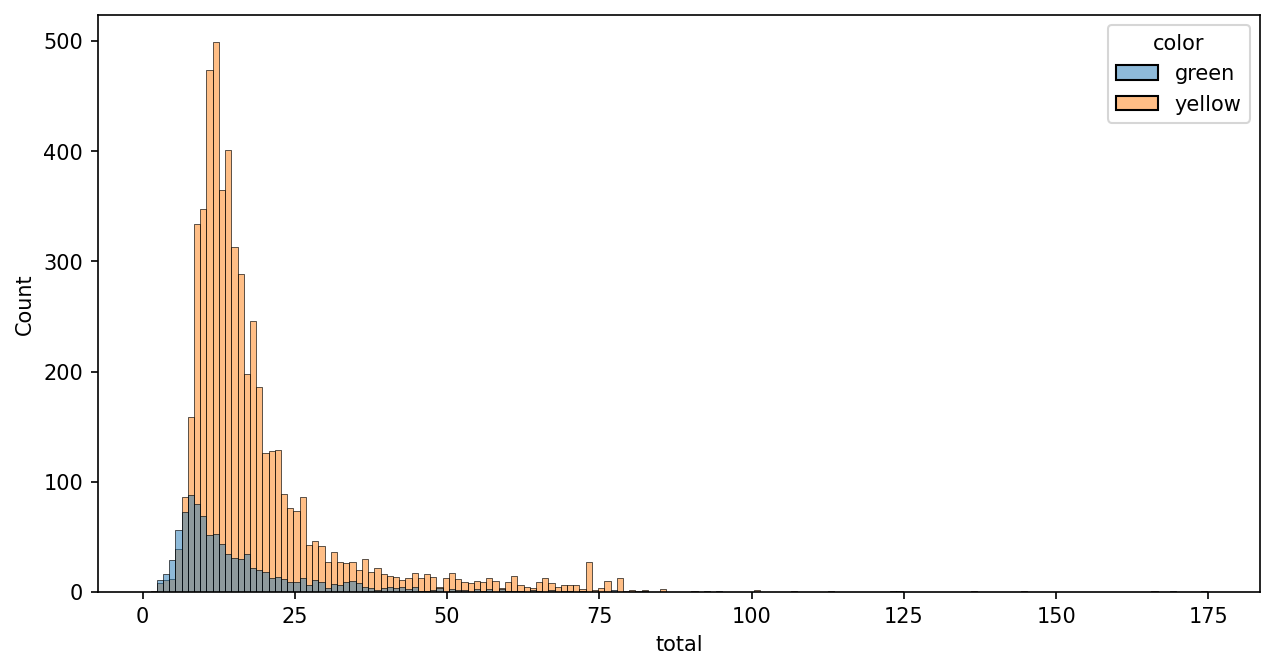

11.Цікаво, а чи є залежність між дальністю поїздки і розміром чайових? Побудуйте діаграму розсіювання між дальністю поїздки і розміром чайових. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. 

В очікуваному результаті я надаю графік, який би будувала я. На наведеному прикладі найскладніша частина - це зробити червоною цю лінію тренду (вона побудована з допомогою спеціального типу графіку в seaborn). Аби вказати колір лінії в тому типу графіку треба зазначити в параметрі `line_kws`, що ми хочемо лінію червоного кольору. Але якщо у вас не буде виходити лінія червоного кольору - нехай буде синього - це не критично :) 

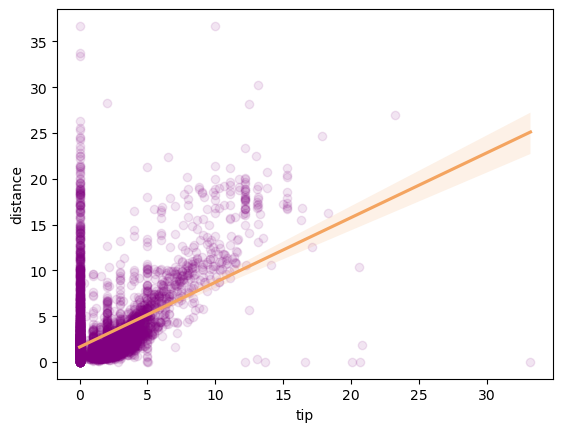

In [32]:
sns.regplot(x = df_taxi_clean.tip, y = df_taxi_clean.distance
            , scatter_kws = {"color": 'purple', "alpha": 0.1}
            , line_kws= {'color': "sandybrown"});

Один з можливих результатів (побудовано з seaborn):

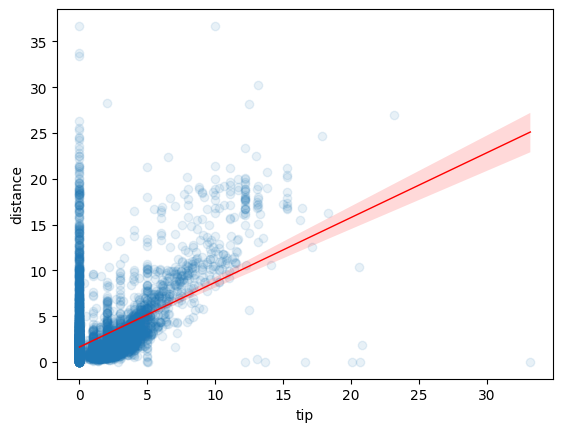

12.Дайте відповідь на питання: що означає пряма лінія з точок, паралельна осі, за якою розташована дальність поїздки?

### Це по факту ті люди, які просто не залишали чайові: вот і виходить, що при сталому розміру tips = 0 змінюється distance, тобто поїздки таки відбуваються.
### Цікавіше глянути навпаки: де distance = 0, а tip>0, можливо це ті варіанти, коли таксі заказують заздалегіть( або просто), потім відміняють і як "вибачення"/"моральний збиток" люди залишають чайові або якийсь інший варіант.

13.Побудуйте поденну динаміку чайових по районам, в яких забрали пасажира. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. Важливо, щоб на одному графіку було 4 лінії (всі райони, крім `NA`), які відображають динаміку чайових, була легенда і були підписи вісей. В очікуваному результаті я надаю графік, який би будувала я. 

Дайте відповіді на питання:
- при початку поїздки в якому районі **найнижчий середній розмір** чайових?
- а в поїздках з якого району **найвищий середній розмір** чайових? 
- при проїздках з його району розмір чайових найстабільніший (найменше змінюється з дня у день)?

In [33]:
borough_pivot_tip = df_taxi_clean[df_taxi_clean.pickup_borough != 'NA'].loc[:,['pickup_day','pickup_borough','tip']]
borough_pivot_tip

,pickup_day,pickup_borough,tip
0,2019-03-23,Manhattan,2.15
1,2019-03-04,Manhattan,0.00
2,2019-03-27,Manhattan,2.36
3,2019-03-10,Manhattan,6.15
4,2019-03-30,Manhattan,1.10
...,...,...,...
6428,2019-03-31,Manhattan,1.06
6429,2019-03-31,Queens,0.00
6430,2019-03-23,Brooklyn,0.00
6431,2019-03-04,Brooklyn,0.00


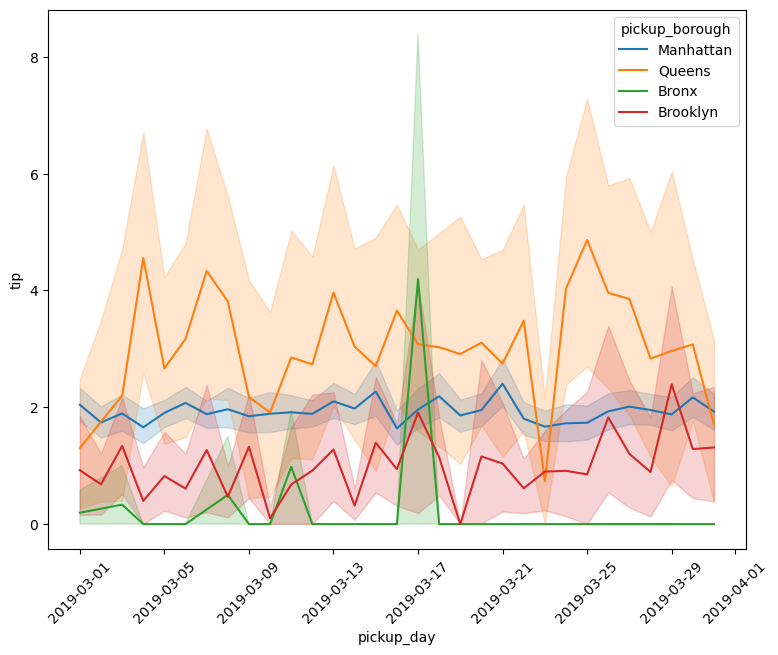

In [34]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.lineplot(data=borough_pivot_tip
             , x='pickup_day'
             , y='tip'
             , hue='pickup_borough'
             , err_style="band"
             , errorbar='ci'
             , estimator='mean'
             , ax=ax)
sns.move_legend(ax, loc='upper right', frameon=True)
plt.xticks(rotation=45);

Відповіді на питання:

1) При початку поїздки в якому районі найнижчий середній розмір чайових?
 Найнижчий середній розмір чайових в Bronx.
2) А в поїздках з якого району найвищий середній розмір чайових?
 Найвищий середній розмір чайових в Queens.
3) При проїздках з його району розмір чайових найстабільніший (найменше змінюється з дня у день)?
 Найстабільніший середній розмір чайових в Manhattan.

Один з можливих результатів (побудовано з seaborn):

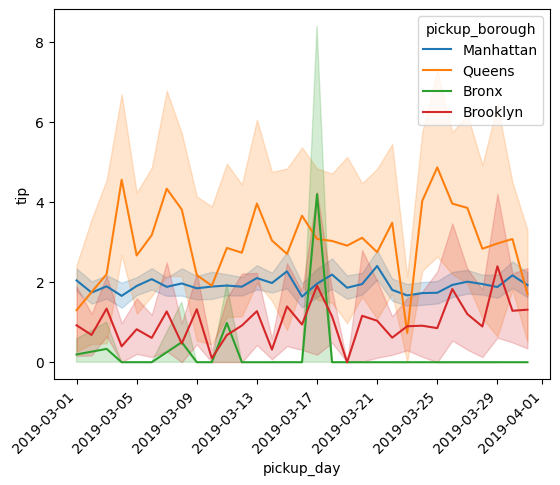

14.Побудуйте box-plot розміру чайових по району (всі райони, крім `NA`) старту поїздки. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. 

''

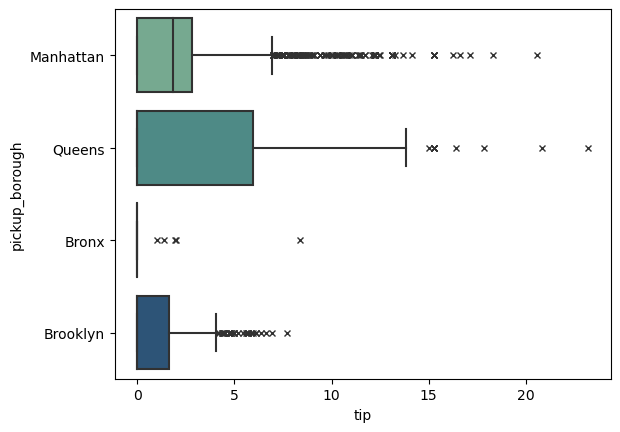

In [35]:
sns.boxplot(data = borough_pivot_tip
            , x='tip'
            , y= 'pickup_borough'
            , flierprops={"marker": "x"}
            , palette = "crest")

;

Один з можливих результатів (побудовано з seaborn):

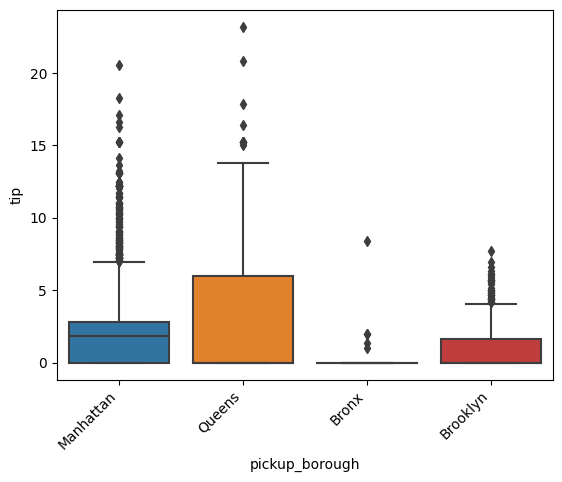

15.Творче завдання. Стовріть ТРИ інформативних візуалізації, які б допомогли в аналізі цих даних.   

Що вам було б цікаво дізнатись про ці поїздки? Як це можна було б використати при прийнятті рішень бізнесом? 
Наприклад, якщо найбільше поїздок в певний час доби, значить, треба стимулювати водіїв працювати в ці години. Якщо найбільше поїздок з певного району - треба тримати там запас авто, які б могли взяти пасажирів і т.д.
Не обмежуйте свою фантазію. 

Візуалізації мають бути не тими, на які ми вже побудували вище. Але можна створювати аналогічні, просто з використанням інших полів даних. І описати, що ви бачите з тих візуалізацій.
Кожна візуалізація оцінюється як 1 завдання. Без виконання цього завдання ДЗ не приймається. Якщо є питання щодо виконання - пишіть у чат.

## №1 Каким инструментом оплаты в каком районе чаще пользуются, возможно где-то больше кэш и стоит принять меры для безопасности водителей. В каких диапазонах оплат используют кэш?

In [36]:
payment = df_taxi_clean.copy()
payment = payment.drop(payment[payment.pickup_borough == 'NA'].index)
payment = payment.drop(payment[payment.payment == 'NA'].index)

payment_bronx = payment[payment.pickup_borough == 'Bronx'].pivot_table(index = ['pickup_day','pickup_borough', 'payment']
                              , values=['total']
                              , aggfunc= 'sum')

payment_brooklyn = payment[payment.pickup_borough == 'Brooklyn'].pivot_table(index = ['pickup_day','pickup_borough', 'payment']
                              , values=['total']
                              , aggfunc= 'sum')

payment_queens  = payment[payment.pickup_borough == 'Queens'].pivot_table(index = ['pickup_day','pickup_borough', 'payment']
                              , values=['total']
                              , aggfunc= 'sum')

payment_manhattan = payment[payment.pickup_borough == 'Manhattan'].pivot_table(index = ['pickup_day','pickup_borough', 'payment']
                              , values=['total']
                              , aggfunc= 'sum')

payment_all = payment.pivot_table(index = ['pickup_day','pickup_borough', 'payment']
                              , values=['total']
                              , aggfunc= 'sum')

In [37]:
# Можно еще и так построить, в одну строку, но тогда визуально сложно оценивать из-за высоких значений 'Manhattan'
#sns.catplot(data=payment_all, x = 'pickup_borough', y = 'total', hue = 'payment', col='pickup_borough', aspect=.8)
# Пыталась еще построить на одной фигуре все 4 графика с помощью FacetGrid, но не получилось, появлялись ошибки.

''

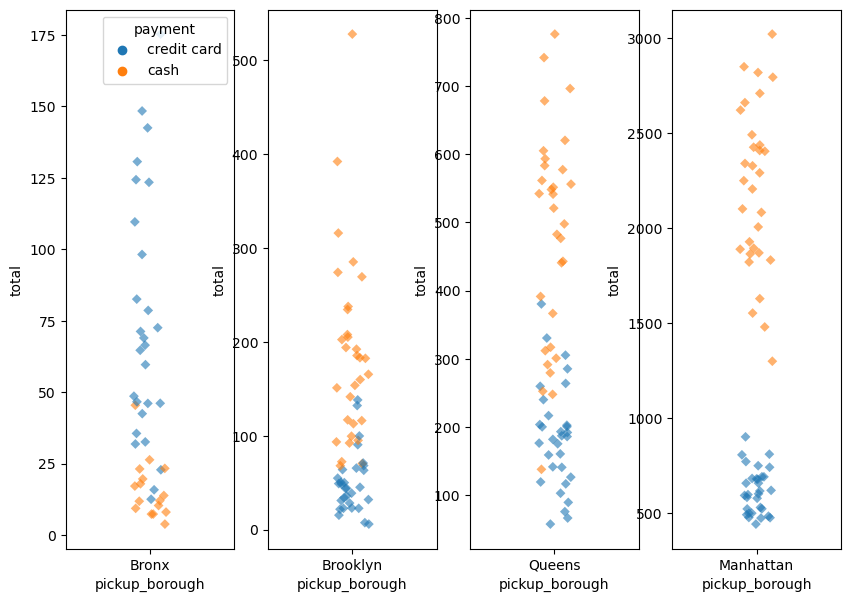

In [38]:
fig, axs = plt.subplots(ncols = 4, figsize = (10, 7))

sns.stripplot(data = payment_bronx
              , x = 'pickup_borough'
              , y = 'total'
              , hue = 'payment'
              , alpha=.6
              , legend = 'auto'
              , marker=  "D"
              ,ax = axs[0])

sns.stripplot(data = payment_brooklyn
              , x = 'pickup_borough'
              , y = 'total'
              , hue = 'payment'
              , alpha = .6
              , marker = "D"
              , legend = False
              ,ax = axs[1])

sns.stripplot(data = payment_queens
              , x = 'pickup_borough'
              , y = 'total'
              , hue = 'payment'
              , alpha = .6
              , marker = "D"
              , legend = False
              ,ax = axs[2])

sns.stripplot(data = payment_manhattan
              , x = 'pickup_borough'
              , y = 'total'
              , hue = 'payment'
              , alpha = .6
              , marker = "D"
              , legend = False
              ,ax = axs[3])
; 

#### Висновок:
#### На даних графіках бачимо, що готівкою менш за все платять люди, які їдуть з Bronx.
#### В Manhattan великий розрив по сумам оплат між готівкою так картою: менші суми оплачують картою, а більше грошей приходить готівкою.
#### В Queens та Brooklyn також менші суми йдуть від карток.
#### З графиіків бачимо, що оплата готівкою у всіх районах крім Bronx домінує.

## №2  Какая зависимость между чаевыми, дальностью поездки и ее длительностью?

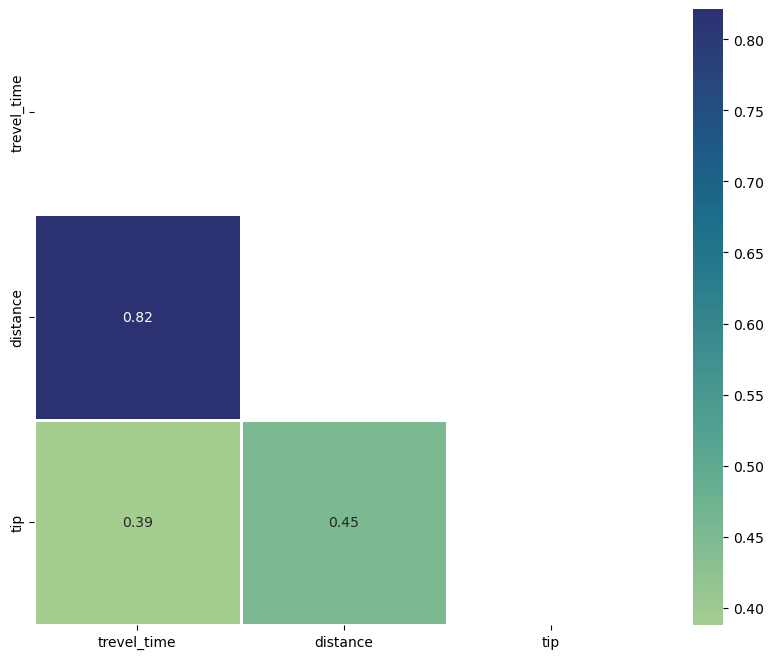

In [39]:
plt.figure(figsize=(10, 8))
matrix = np.triu(df_taxi_clean[['trevel_time', 'distance', 'tip']].corr())
sns.heatmap(df_taxi_clean[['trevel_time', 'distance', 'tip']].corr()
            , annot=True
            , linewidth=.8
            , mask=matrix
            , cmap="crest");

#### Висновок:
#### Бачимо високий коеф-т кореляції  0.82 між часом поїздки та її дальністю, що логічно.
#### Менш помітну має кореляцію чайові та час поїздки = 0.39
#### Більш помітну кореляцію мають чайові та дальність поїздки = 0.45

## №3  В какое время дня водители увеличивают скорость поездки, в какие часы скорость поездки уменьшается(возможно пробки?) и с какой скоростью ездят в разных районах?

In [40]:
df_taxi_clean['time'] = pd.to_datetime(df_taxi_clean['pickup']).dt.hour
df_taxi_clean['speed'] = df_taxi_clean.distance / df_taxi_clean.trevel_time

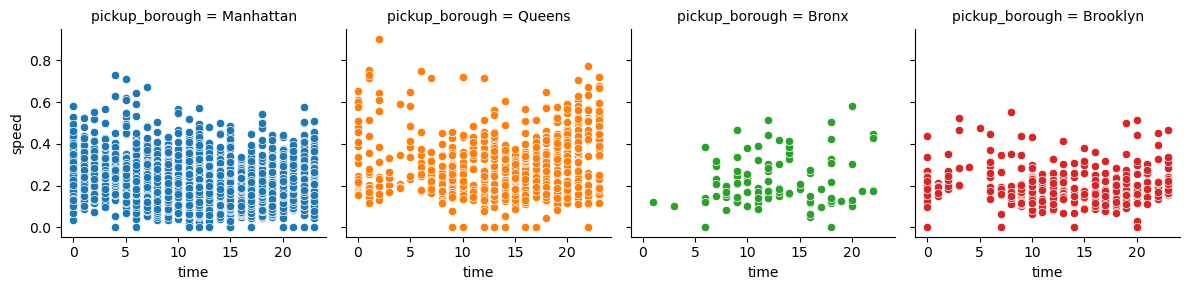

In [41]:
speed = df_taxi_clean[(df_taxi_clean.pickup_borough != 'NA') & (df_taxi_clean.speed < 2)]
graph_1 = sns.FacetGrid (speed, col = 'pickup_borough', hue = 'pickup_borough')
graph_1.map (sns.scatterplot, "time", 'speed');

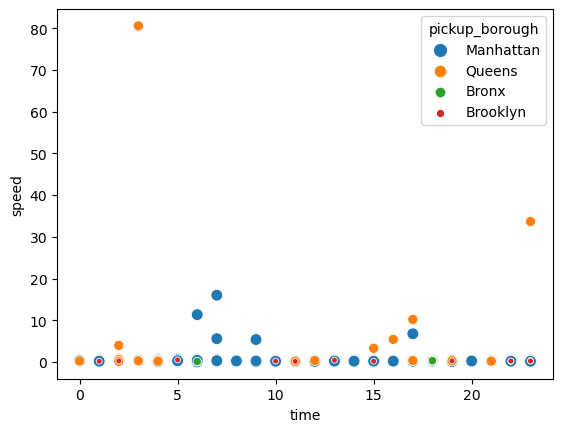

In [42]:
sns.scatterplot(data=df_taxi_clean[(df_taxi_clean.pickup_borough != 'NA')]
                , x="time", y="speed", hue="pickup_borough", size="pickup_borough");

#### Висновок:
#### Ми маємо декілька великих викідів по швидкості з великими значеннями. Якщо дивитися графіки без цих викідів, то бачимо, що в  Manhattan водії підвищують швидкість в першу половину дня, а в Queens навпаки - швидкість збільшується в вечірній час. З Bronx найменше поїздок відбувається, а поїздки з Brooklyn порівняно з першими двома районами мають меншу швидкість.